In [1]:
import os
import numpy as np
import scipy.io as spio
import scipy.optimize as opt
import matplotlib.pyplot as plt
from linearRegCostFunction import RegCost, gdReg

In [2]:
#ler arquivo de dados
data = spio.loadmat('data/ex5data1.mat')
#armazena os dados de cada array identificado em [''] na sua respectiva variável a ser usada
X = np.c_[np.ones_like(data['X']), data['X']]
Xtest = np.c_[np.ones_like(data['Xtest']), data['Xtest']]
Xval = np.c_[np.ones_like(data['Xval']), data['Xval']]
y = data ['y']
ytest = data['ytest']
yval = data ['yval']

In [3]:
def plot (X, y):
    
    plt.axis([-50, 40, 0, 50])
    plt.scatter(X[:,1:].T, y, color='red', marker='x')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    
    #define o nome do arquivo que guardará a imagem do gráfico, e cria o caminho, caso não exista
    filename = 'target/plot5.1.png'
    if not os.path.exists(os.path.dirname(filename)):
      os.makedirs(os.path.dirname(filename))

    #salva imagem do gráfico e o exibe
    plt.savefig(filename)
    plt.show()

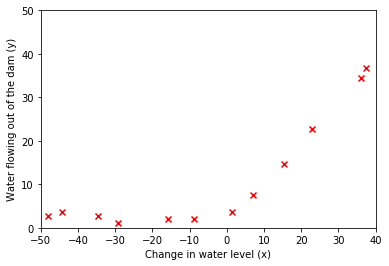

In [4]:
plot(X, y)

In [5]:
theta = np.ones((X.shape[1],1))
lamb=1
#custo encontrado
J=RegCost(lamb, X, y, theta)
print (J)

303.9931922202643


In [6]:
#valores do gradiente
gd = gdReg(lamb, X, y, theta)
print (gd)

[[-15.30301567]
 [598.25074417]]


In [7]:
def plotlinear (X, y, theta):
    
    t = np.arange(-50, 40, 1)
    plt.axis([-50, 40, -5, 50])
    plt.scatter(X[:,1:].T, y, color='red', marker='x')
    plt.plot(t, theta[0] + (theta[1]*t), color = 'blue')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water flowing out of the dam (y)')
    
    #define o nome do arquivo que guardará a imagem do gráfico, e cria o caminho, caso não exista
    filename = 'target/plot5.4.png'
    if not os.path.exists(os.path.dirname(filename)):
      os.makedirs(os.path.dirname(filename))

    #salva imagem do gráfico e o exibe
    plt.savefig(filename)
    plt.show()

In [8]:
def minimize (theta, X, y, lamb):
    epochs = 5000
    alpha = 0.01
    cost = np.zeros(epochs)
    
    for i in range(epochs):
        gradient = gdReg(lamb, X, y, theta)
        theta = theta - (alpha*gradient)
        cost[i] = RegCost(lamb, X, y, theta=theta)
    
    return cost[-1], theta    

In [9]:
theta0 = np.zeros((X.shape[1],1))
custo, theta1 = minimize(theta0, X, y, lamb=0)

C:\Users\Liss\Desktop\AMT1\linearRegCostFunction.py:9: RuntimeWarning: overflow encountered in square
  cost=(np.sum((X.dot(theta) - y)**2))
C:\Users\Liss\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Liss\Desktop\AMT1\linearRegCostFunction.py:12: RuntimeWarning: overflow encountered in square
  reg = (np.sum(np.square(theta[1:]))*lamb)
C:\Users\Liss\Desktop\AMT1\linearRegCostFunction.py:12: RuntimeWarning: invalid value encountered in double_scalars
  reg = (np.sum(np.square(theta[1:]))*lamb)
C:\Users\Liss\Desktop\AMT1\linearRegCostFunction.py:27: RuntimeWarning: invalid value encountered in multiply
  reg = (lamb*np.r_[[[0]], theta[1:]])
